# Import the Libraries

In [128]:
#For numerical libraries
import numpy as np
#To handle data in the form of rows and columns
import pandas as pd
#importing seaborn for statistical plots
import seaborn as sns
#importing ploting libraries
import matplotlib.pyplot as plt
#styling figures
plt.rc('font',size=14)
sns.set(style='white')
sns.set(style='whitegrid',color_codes=True)
#To enable plotting graphs in Jupyter notebook
%matplotlib inline
#importing the feature scaling library
from sklearn.preprocessing import StandardScaler
#Import Sklearn package's data splitting function which is based on random function
from sklearn.model_selection import train_test_split
# Import Linear Regression, Ridge and Lasso machine learning library
from sklearn.linear_model import LinearRegression, Ridge, Lasso
# Import KNN Regressor machine learning library
from sklearn.neighbors import KNeighborsRegressor
# Import Decision Tree Regressor machine learning library
from sklearn.tree import DecisionTreeRegressor
# Import ensemble machine learning library
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor)
# Import support vector regressor machine learning library
from sklearn.svm import SVR
#Import the metrics
from sklearn import metrics
#Import the Voting regressor for Ensemble
from sklearn.ensemble import VotingRegressor
# Import stats from scipy
from scipy import stats
# Import zscore for scaling
from scipy.stats import zscore
#importing the metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
#importing the K fold
from sklearn.model_selection import KFold
#importing the cross validation score
from sklearn.model_selection import cross_val_score
#importing the preprocessing library
from sklearn import preprocessing
# importing the Polynomial features
from sklearn.preprocessing import PolynomialFeatures
#importing kmeans clustering library
from sklearn.cluster import KMeans
from sklearn.utils import resample

# Load the dataset

In [129]:
#reading the CSV file into pandas dataframe
df = pd.read_csv('concrete.csv')

In [130]:
#Check top five records of the dataset
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [131]:
# check the number of rows and columns
df.shape

(1030, 9)

# Exploratory data analyis


# Univariate analysis

In [138]:
#To show the detailed summary 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [ ]:
# It gives the details about the number of rows (1030), number of columns (9) 
# It gives data types information of features, except age which is integer type all other columns are float type.
# There are no null values in the data.

In [139]:
#To get the columns name
df.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')

In [141]:
#Analyze the distribution of the dataset
df.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [ ]:
# Above table gives the descriptive statistics (mean, median, mode, percentiles, min, max, standard deviation) and count of the columns of the dataset.
# We can see that cement,slag,ash are left skewed.

# Description of independent attributes

In [142]:
#Range of values observed
Range=df.max()-df.min()
print(Range)

cement          438.00
slag            359.40
ash             200.10
water           125.20
superplastic     32.20
coarseagg       344.00
fineagg         398.60
age             364.00
strength         80.27
dtype: float64


In [143]:
# Mean of attributes values
Mean = df.mean()
print(Mean)

cement          281.167864
slag             73.895825
ash              54.188350
water           181.567282
superplastic      6.204660
coarseagg       972.918932
fineagg         773.580485
age              45.662136
strength         35.817961
dtype: float64


In [144]:
# Median of attributes values
Median=df.median()
print(Median)

cement          272.900
slag             22.000
ash               0.000
water           185.000
superplastic      6.400
coarseagg       968.000
fineagg         779.500
age              28.000
strength         34.445
dtype: float64


In [145]:
# Standard deviation of attributes values
SD=df.std()
print('Standard deviation:\n',SD)

Standard deviation:
 cement          104.506364
slag             86.279342
ash              63.997004
water            21.354219
superplastic      5.973841
coarseagg        77.753954
fineagg          80.175980
age              63.169912
strength         16.705742
dtype: float64


In [146]:
# Quartiles of attributes
Q1=df.quantile(0.25)
print(Q1)

cement          192.375
slag              0.000
ash               0.000
water           164.900
superplastic      0.000
coarseagg       932.000
fineagg         730.950
age               7.000
strength         23.710
Name: 0.25, dtype: float64


In [147]:
# Quartiles of attributes
Q3=df.quantile(0.75)
print(Q3)

cement           350.000
slag             142.950
ash              118.300
water            192.000
superplastic      10.200
coarseagg       1029.400
fineagg          824.000
age               56.000
strength          46.135
Name: 0.75, dtype: float64


In [148]:
#  Interquartile range (IQR)
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
print(IQR)

cement          157.625
slag            142.950
ash             118.300
water            27.100
superplastic     10.200
coarseagg        97.400
fineagg          93.050
age              49.000
strength         22.425
dtype: float64


# Distribution of attributes

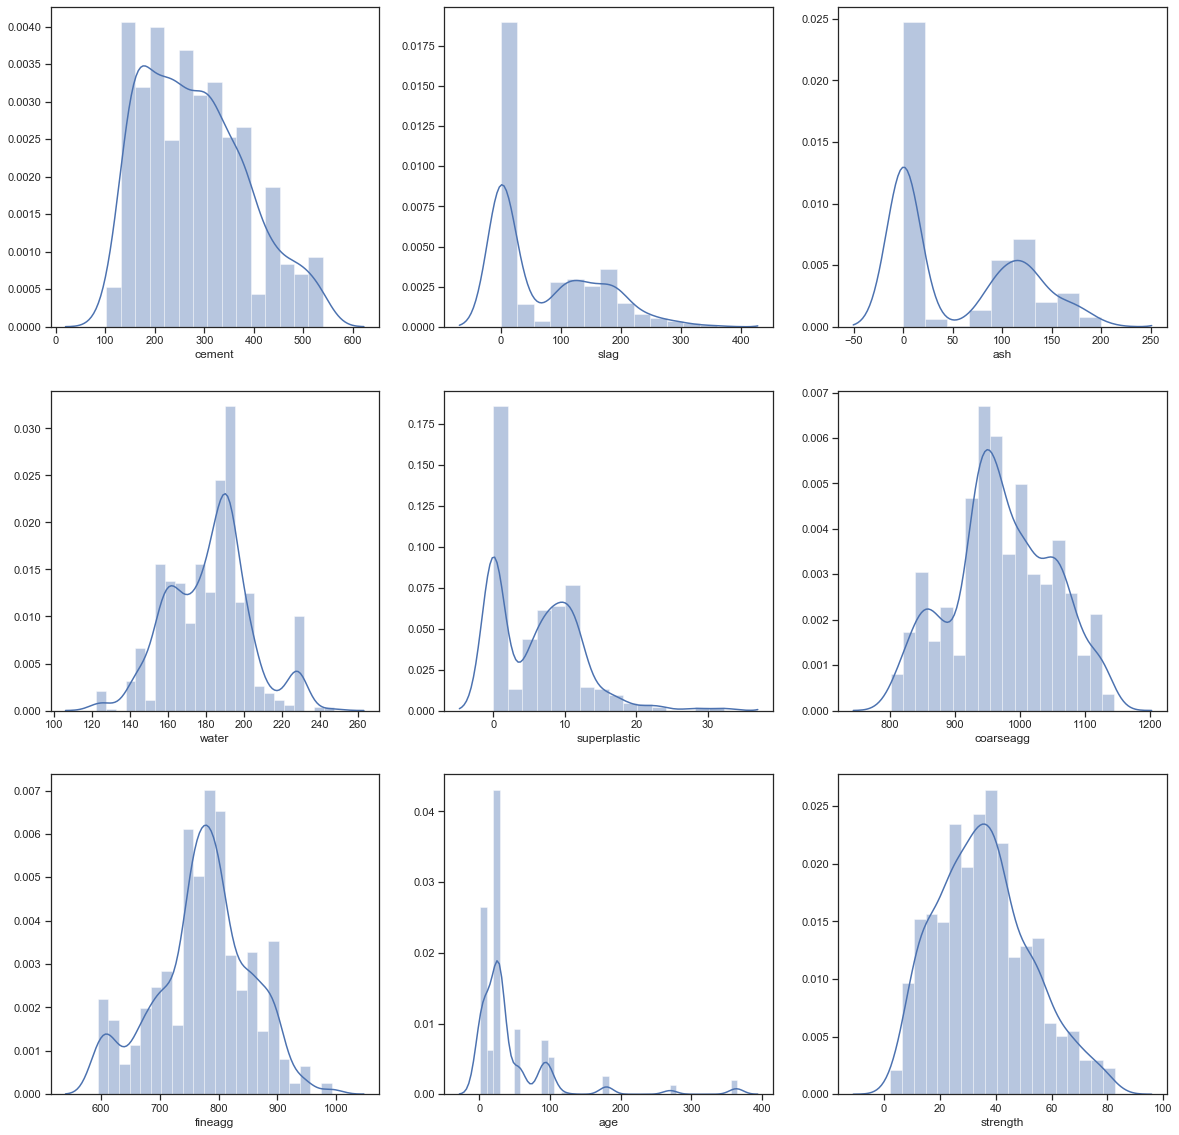

In [15]:
import seaborn as sns
sns.set(style="ticks")
%matplotlib inline
plt.figure(figsize=(20,20))
pos=1
for feature in df.columns:
    plt.subplot(3,3,pos)
    if feature in ['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength']:
        sns.distplot(df[feature], kde=True)
    else:
        sns.countplot(df[feature],palette='Blues')
    pos+=1

In [17]:
# check null values
print('null value count:',)
print(df.isnull().sum())

null value count:
cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64


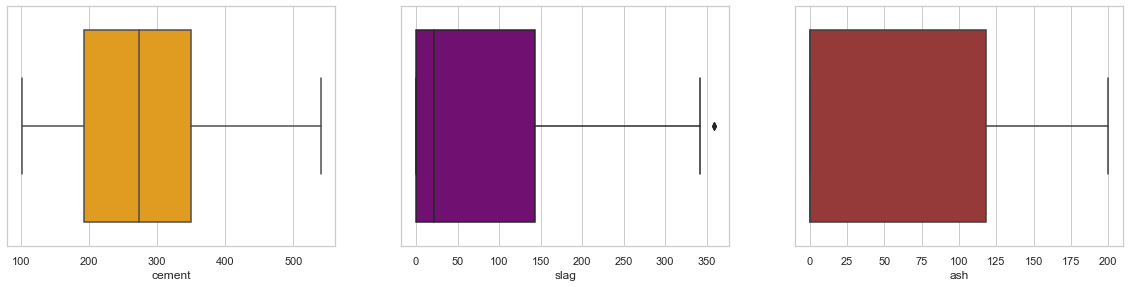

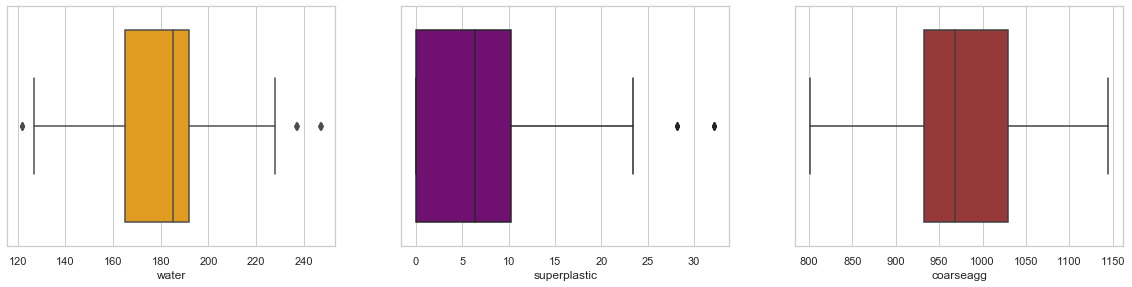

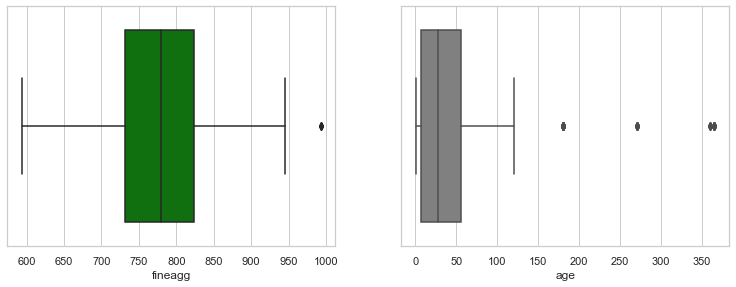

In [18]:
#checking outliers using boxplot
plt.figure(figsize=(20,15))

plt.subplot(3,3,1)
sns.boxplot(x=df['cement'], color='orange')
            
plt.subplot(3,3,2)
sns.boxplot(x=df['slag'], color='purple')
            
plt.subplot(3,3,3)
sns.boxplot(x=df['ash'], color='brown')
            

plt.figure(figsize=(20,15))

plt.subplot(3,3,1)
sns.boxplot(x=df['water'], color='orange')
            
plt.subplot(3,3,2)
sns.boxplot(x=df['superplastic'], color='purple')
            
plt.subplot(3,3,3)
sns.boxplot(x=df['coarseagg'], color='brown')
            
plt.figure(figsize=(20,15))

plt.subplot(3,3,1)
sns.boxplot(x=df['fineagg'], color='green')
            
plt.subplot(3,3,2)
sns.boxplot(x=df['age'], color='grey')

plt.show()         


# Multivariate Analysis

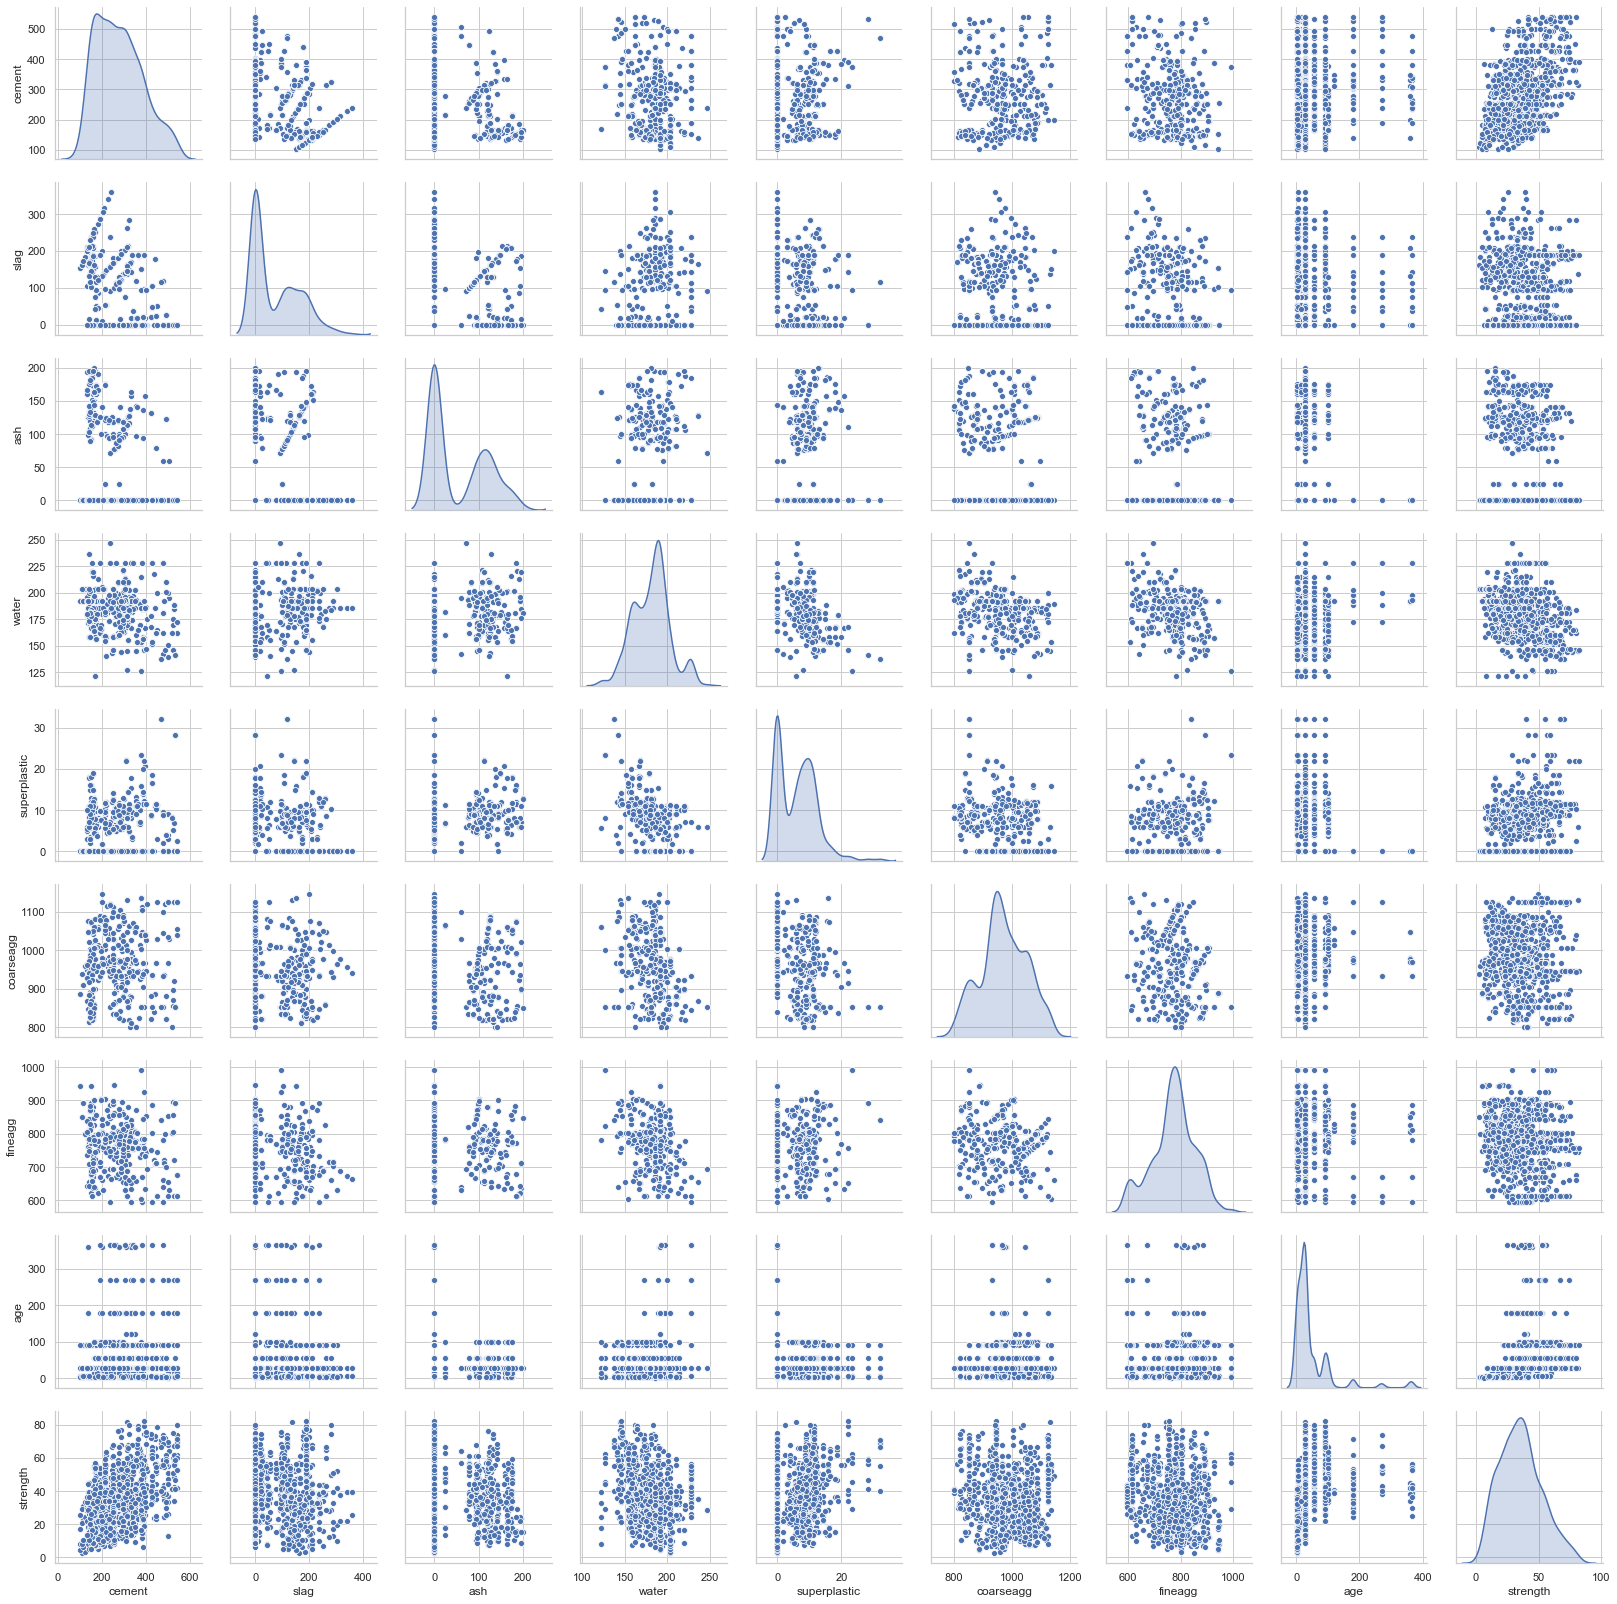

In [19]:
sns.pairplot(df, diag_kind='kde') 

In [ ]:
# We can see the below observations from the above pair plot :
*cement is almost normal. 
*slag has three gausssians and rightly skewed.
*ash has two gaussians and rightly skewed.
*water has three guassians and slighly left skewed.
*superplastic has two gaussians and rightly skewed.
*coarseagg has three guassians and almost normal.
*fineagg has almost two guassians and looks like normal.
*age has multiple guassians and rightly skewed.

*cement vs other independent attributes: This attribute does not have any significant relation with slag, ash, water, superplatic, coarseagg,fineagg and age. It almost spread like a cloud. If we had calculated the r value it would have come close to 0.
*slag vs other independent attributes: This attribute also does not have any significant relation with ash, water, superplatic, coarseagg,fineagg and age. It almost spread like a cloud. If we had calculated the r value it would have come close to 0.
*ash vs other independent attributes: This attribute also does not have any significant relation with water, superplatic, coarseagg,fineagg and age. It almost spread like a cloud. If we had calculated the r value it would have come close to 0.
*water vs other independent attributes: This attribute have negative linear relationship with superplastic and fineagg. It does not have any significant relationship with other independent atributes. This is true as Superplasticizers allows the reduction of water in the concrete upto the extent of 30% without reducing the workability.
*superplastic vs other independent attributes:This attribute have negative linear relationship with water only. It does not have any significant relationship with other independent attributes.
*coarseagg vs other independent attributes:This attribute also does not have any significant relation with any other attributes. It almost spread like a cloud. If we had calculated the r value it would have come close to 0.
*fineagg vs other independent attributes:It has negative linear relationship with water. It does not have any significant relation with any other attributes. It almost spread like a cloud. If we had calculated the r value it would have come close to 0.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A0D0A9E908>,
      dtype=object)

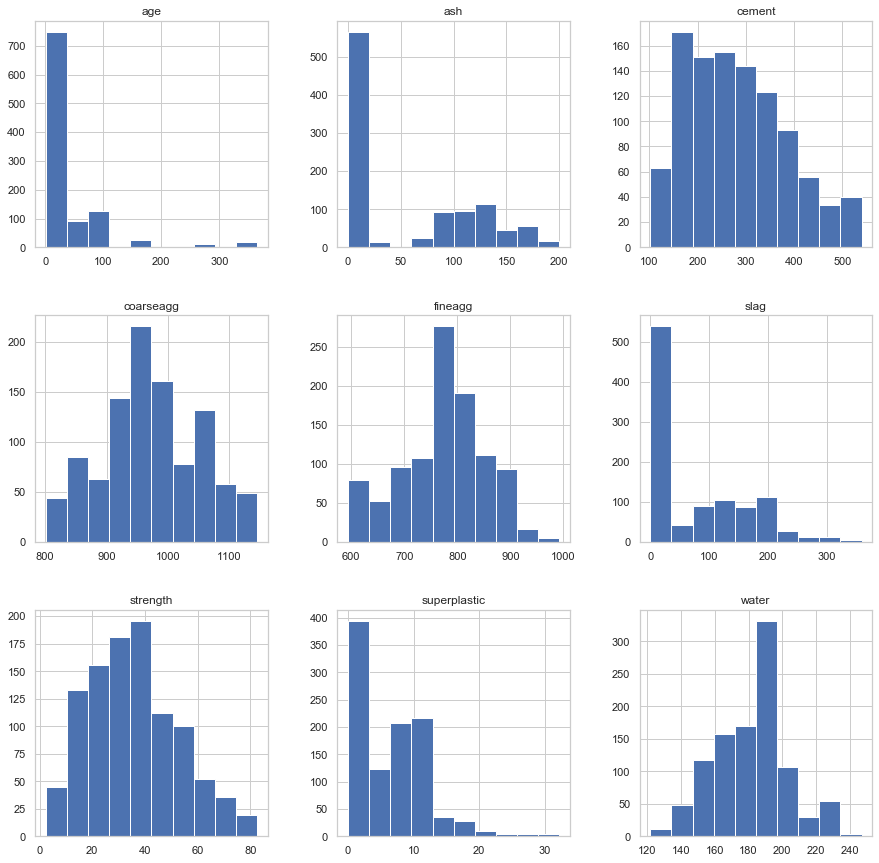

In [135]:
df.hist(figsize=(15,15))

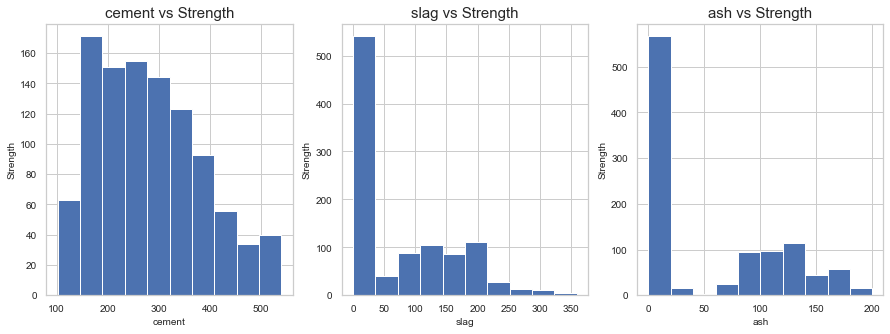

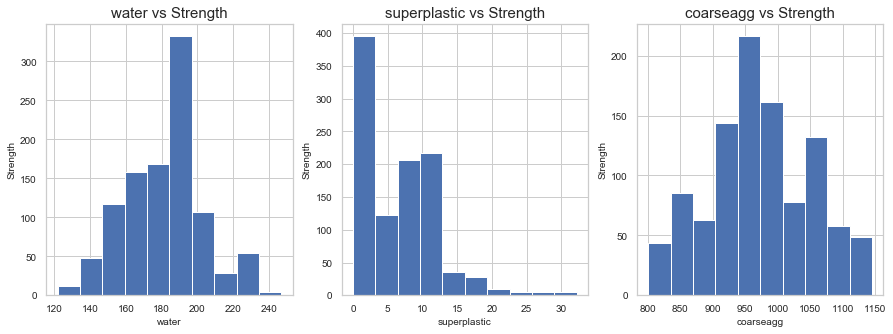

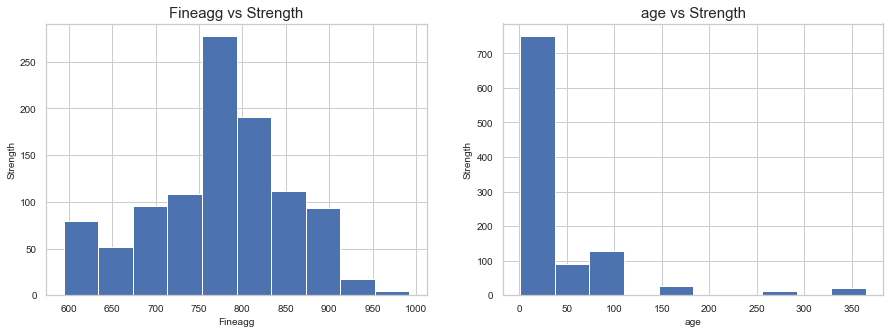

In [134]:
plt.rc('font',size=14)
sns.set(style='white')
sns.set(style='whitegrid',color_codes=True)

fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,5))

ax1.hist(df['cement'])
ax1.set_xlabel('cement', fontsize=10)
ax1.set_ylabel('Strength', fontsize=10)
ax1.set_title('cement vs Strength', fontsize=15)
ax1.tick_params(labelsize=10)

ax2.hist(df['slag'])
ax2.set_xlabel('slag', fontsize=10)
ax2.set_ylabel('Strength', fontsize=10)
ax2.set_title('slag vs Strength', fontsize=15)
ax2.tick_params(labelsize=10)

ax3.hist(df['ash'])
ax3.set_xlabel('ash', fontsize=10)
ax3.set_ylabel('Strength', fontsize=10)
ax3.set_title('ash vs Strength', fontsize=15)
ax3.tick_params(labelsize=10)

fig, (ax4,ax5,ax6)=plt.subplots(1,3,figsize=(15,5))

ax4.hist(df['water'])
ax4.set_xlabel('water', fontsize=10)
ax4.set_ylabel('Strength', fontsize=10)
ax4.set_title('water vs Strength', fontsize=15)
ax4.tick_params(labelsize=10)

ax5.hist(df['superplastic'])
ax5.set_xlabel('superplastic', fontsize=10)
ax5.set_ylabel('Strength', fontsize=10)
ax5.set_title('superplastic vs Strength', fontsize=15)
ax5.tick_params(labelsize=10)

ax6.hist(df['coarseagg'])
ax6.set_xlabel('coarseagg', fontsize=10)
ax6.set_ylabel('Strength', fontsize=10)
ax6.set_title('coarseagg vs Strength', fontsize=15)
ax6.tick_params(labelsize=10)

fig, (ax7,ax8)=plt.subplots(1,2,figsize=(15,5))
ax7.hist(df['fineagg'])
ax7.set_xlabel('Fineagg', fontsize=10)
ax7.set_ylabel('Strength', fontsize=10)
ax7.set_title('Fineagg vs Strength', fontsize=15)
ax7.tick_params(labelsize=10)

ax8.hist(df['age'])
ax8.set_xlabel('age', fontsize=10)
ax8.set_ylabel('Strength', fontsize=10)
ax8.set_title('age vs Strength', fontsize=15)
ax8.tick_params(labelsize=10)


In [ ]:
# strength attribute : Relationship between dependent and independent attributes
# strength: Now its comparing the target column with all other independent attributes and its showing us very vital information.
*strength vs cement: It is linearly related to the cement. The relationship is positive and we can see that for a given value of cement we have a multiple values of strength. Which one should we pick we don't know. Hence Cement though it has poditive relationship with the strength, it is not a very good predictor. It is a weak predictor.
*strength vs slag: There is no particular trend.
*strength vs ash: There is also no particular trend.
*strength vs age: For a given value of age, we have different values of strength. Hence, It is not a good predictor.
*Other attributes does not give any strong relationship with strength.

In [76]:
# corrlation matrix 
cor=df.corr()
cor

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplastic,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarseagg,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fineagg,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


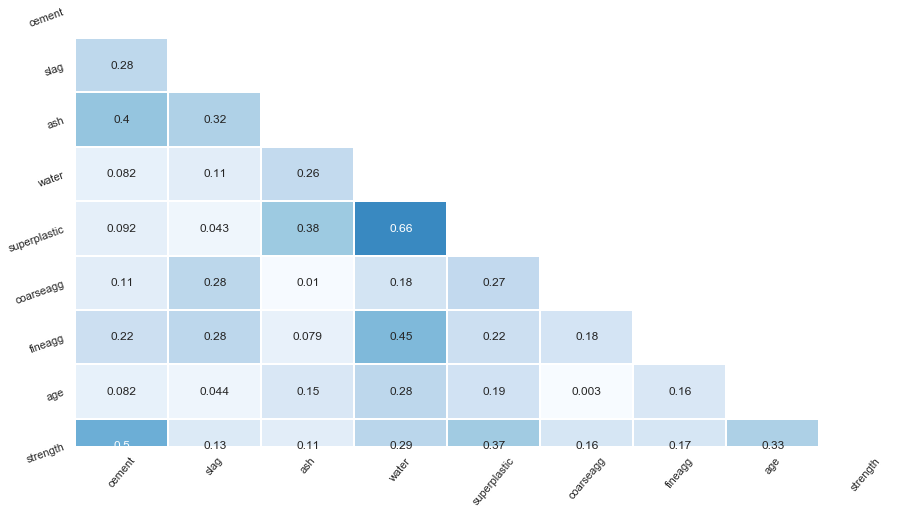

In [242]:
#heatmap
corr = abs(df.corr())
lower_triangle=np.tril(corr, k=-1)
mask = lower_triangle == 0
plt.figure(figsize = (15,8))
sns.set_style(style = 'white')
sns.heatmap(lower_triangle, center=0.5, cmap='Blues', annot=True, xticklabels=corr.index, yticklabels=corr.columns, 
            cbar=False, linewidths=1, mask=mask)
plt.xticks(rotation=50)
plt.yticks(rotation=20)
plt.show()

In [ ]:
#water shows significant negative relationship with superplastic and fineagg.

# strategy to address the missing values and outliers

In [136]:
#Checking for missing values
df.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [ ]:
*There are no missing values in the data set.

# Checking for outliers

In [149]:
#Creating copy of original dataset
df1=df.copy()

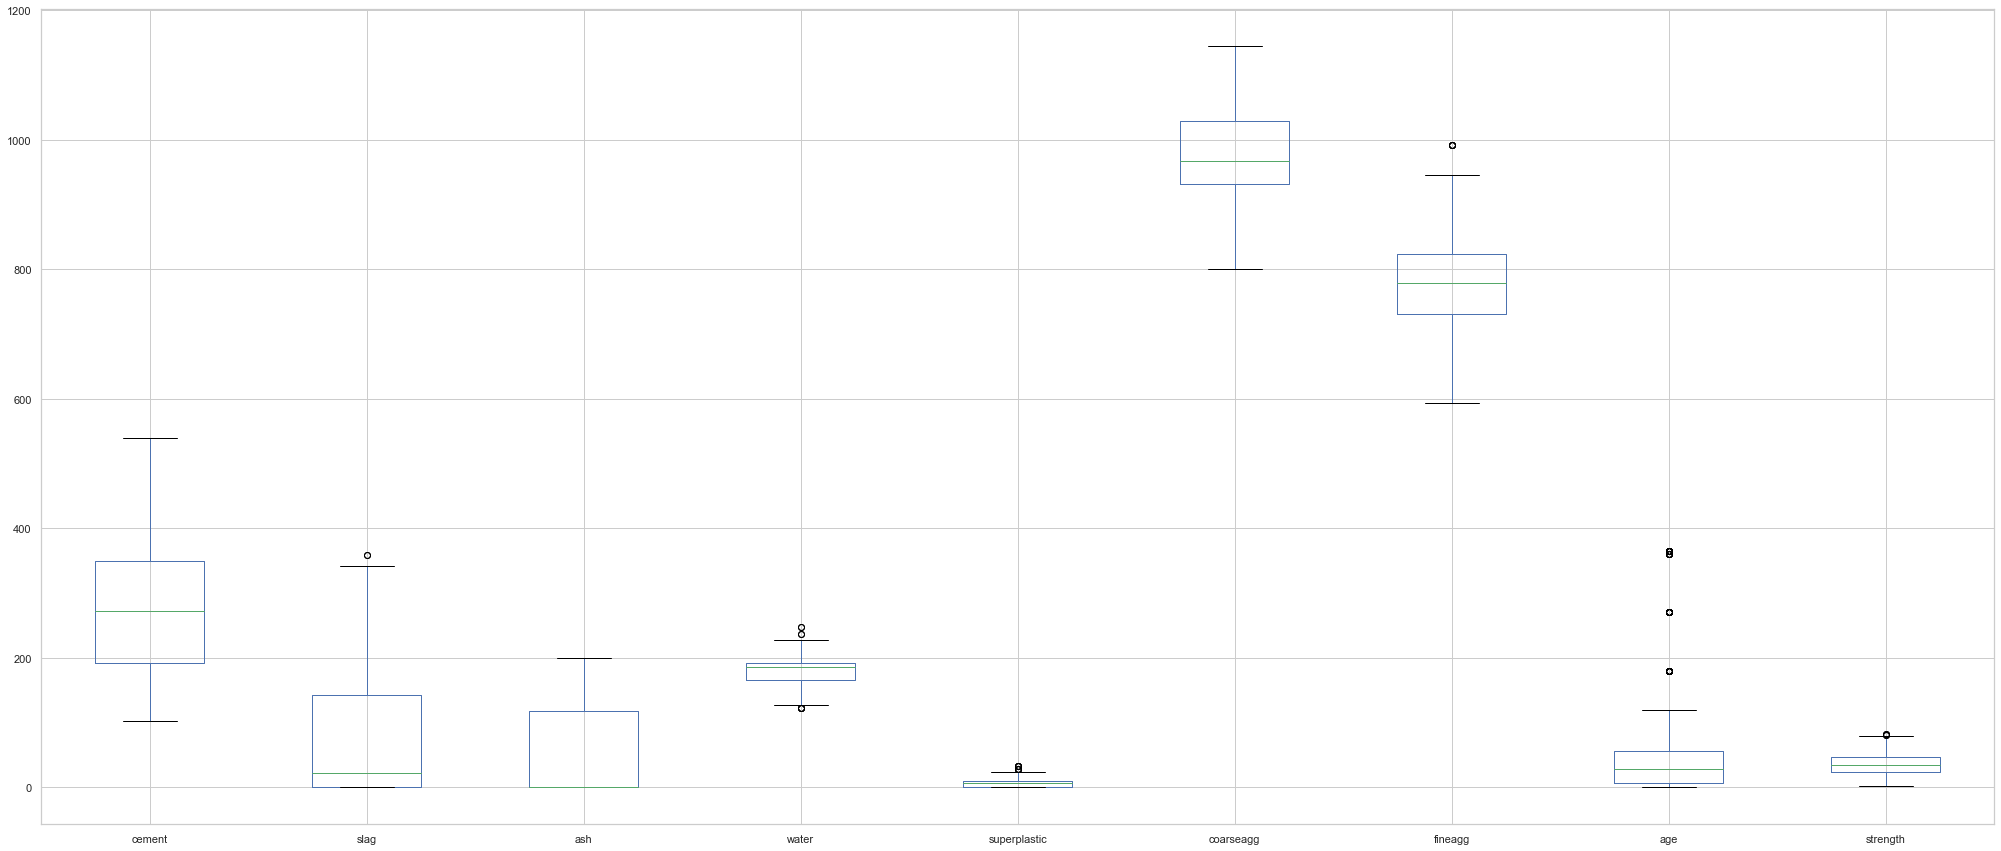

In [150]:
# again check for outliers in dataset after handling missing values using boxplot
df1.boxplot(figsize=(35,15))

In [ ]:
* It  shows that slag, ash, water superplastic, and age contains outliers.

In [151]:
print('Number of outliers in cement: ',df1[((df1.cement - df1.cement.mean()) / df1.cement.std()).abs() >3]['cement'].count())
print('Number of outliers in slag: ',df1[((df1.slag - df1.slag.mean()) / df1.slag.std()).abs() >3]['slag'].count())
print('Number of outliers in ash: ',df1[((df1.ash - df1.ash.mean()) /df1.ash.std()).abs() >3]['ash'].count())
print('Number of outliers in water: ',df1[((df1.water - df.water.mean()) / df1.water.std()).abs() >3]['water'].count())
print('Number of outliers in superplastic: ',df1[((df1.superplastic - df1.superplastic.mean()) / df1.superplastic.std()).abs() >3]['superplastic'].count())
print('Number of outliers in coarseagg: ',df1[((df1.coarseagg - df1.coarseagg.mean()) / df1.coarseagg.std()).abs() >3]['coarseagg'].count())
print('Number of outliers in fineagg: ',df1[((df1.fineagg - df1.fineagg.mean()) /df1.fineagg.std()).abs() >3]['fineagg'].count())
print('Number of outliers in age: ',df1[((df1.age - df1.age.mean()) / df1.age.std()).abs() >3]['age'].count())


Number of outliers in cement:  0
Number of outliers in slag:  4
Number of outliers in ash:  0
Number of outliers in water:  2
Number of outliers in superplastic:  10
Number of outliers in coarseagg:  0
Number of outliers in fineagg:  0
Number of outliers in age:  33


In [ ]:
*Here, we have used Standard deviation method to detect the outliers.If we have any data point that is more than 3 times the standard deviation, then those points are very likely to be outliers.
*We can see that slag, water, superplastic and age contain outliers.

# Handling the outliers

In [152]:
#Replacing the outliers by median
for col_name in df1.columns[:-1]:
    q1 = df1[col_name].quantile(0.25)
    q3 = df1[col_name].quantile(0.75)
    iqr = q3 - q1
    
    low = q1-1.5*iqr
    high = q3+1.5*iqr
    df1.loc[(df1[col_name] < low) | (df1[col_name] > high), col_name] = df1[col_name].median()

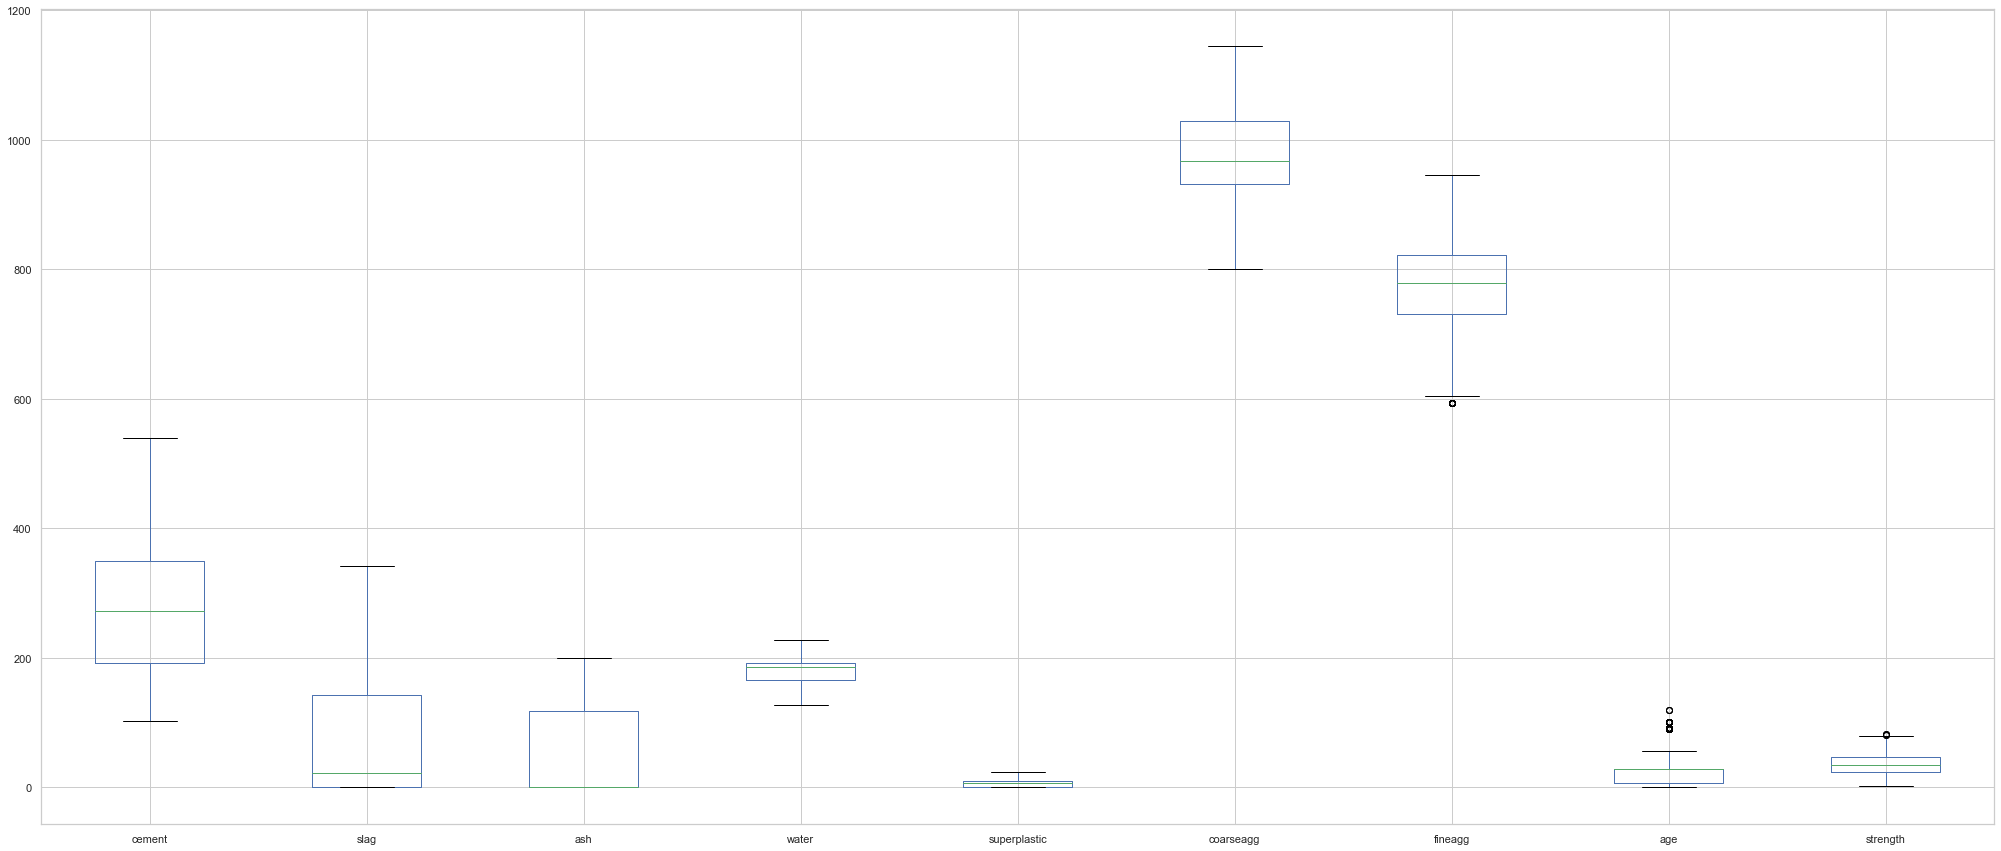

In [153]:
# again check for outliers in dataset using boxplot
df1.boxplot(figsize=(35,15))

# Feature Engineering, Model Building and Model Tuning

In [ ]:
# Scaling the features

In [ ]:
from sklearn import preprocessing

ZX = preprocessing.scale(X)
ZX_train, ZX_test, y_train, y_test = train_test_split(ZX, y, test_size=0.3, random_state=1)

In [158]:
#Scaling the dataset
df_z = df1.apply(zscore)
df_z=pd.DataFrame(df_z,columns=df.columns)

In [ ]:
*Here, all the attributes in the same scale(unit) except the age attribute. Hence, we are scaling the attributes by using zscore.

In [159]:
#independent and dependent variables
X=df_z.iloc[:,0:8]
y = df_z.iloc[:,8]

In [160]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

In [161]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train , y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [162]:
#printing the feature importance
print('Feature importances: \n',pd.DataFrame(dt_model.feature_importances_,columns=['Imp'],index=X_train.columns))

Feature importances: 
                    Imp
cement        0.351143
slag          0.096715
ash           0.011768
water         0.126405
superplastic  0.017455
coarseagg     0.035115
fineagg       0.032631
age           0.328769


In [ ]:
* So, cement, age and water are significant attributes.
* Here, ash, coarseagg, fineagg, superplastic and slag are the less significant variable.These will impact less to the strength column. This we have seen in pairplot also.

In [163]:
y_pred = dt_model.predict(X_test)
print('Performance on training data using DT:',dt_model.score(X_train,y_train))
print('Performance on testing data using DT:',dt_model.score(X_test,y_test))
acc_DT=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_DT)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using DT: 0.9917907393004437
Performance on testing data using DT: 0.840930965685397
Accuracy DT:  0.8409309656853969
MSE:  0.16604583259705066


In [ ]:
* There is a overfitting in the model as the dataset is performing 99% accurately in trainnig data and the accuracy on test data drops.

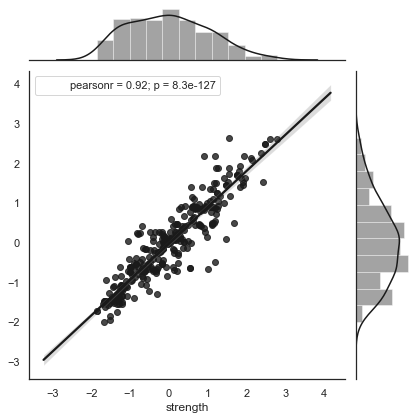

In [166]:
from scipy.stats import pearsonr
sns.set(style="darkgrid", color_codes=True)   
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred, stat_func=pearsonr,kind="reg", color="k");

In [167]:
#Store the accuracy results for each model in a dataframe for final comparison
results = pd.DataFrame({'Model':['Decision Tree'], 'accuracy': acc_DT},index={'1'})
results = results[['Model', 'accuracy']]
results

,Model,accuracy
1,Decision Tree,0.840931


# K fold cross validation

In [168]:
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(dt_model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.8562467132901729
Standard Deviation:  0.04030374936803062


In [169]:
tempResultsDf = pd.DataFrame({'Model':['Decision Tree k fold'], 'accuracy': [accuracy]},index={'2'})
results = pd.concat([results, tempResultsDf])
results = results[['Model', 'accuracy']]
results

,Model,accuracy
1,Decision Tree,0.840931
2,Decision Tree k fold,0.856247


# Iteration 2

#Drop the least significant variable

In [170]:
#Create a copy of the dataset
df2=df_z.copy()

In [174]:
#independent and dependent variable
X = df2.drop( ['strength','ash','coarseagg','fineagg'] , axis=1)
y = df2['strength']
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

In [175]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train , y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [176]:
#printing the feature importance
print('Feature importances: \n',pd.DataFrame(dt_model.feature_importances_,columns=['Imp'],index=X_train.columns))

Feature importances: 
                    Imp
cement        0.370832
slag          0.108423
water         0.159643
superplastic  0.032167
age           0.328935


In [177]:
y_pred = dt_model.predict(X_test)
print('Performance on training data using DT:',dt_model.score(X_train,y_train))
print('Performance on testing data using DT:',dt_model.score(X_test,y_test))
acc_DT=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_DT)

Performance on training data using DT: 0.991045963372976
Performance on testing data using DT: 0.8415135919974547
Accuracy DT:  0.8415135919974548


In [ ]:
* The acuracy on testing dataset is not improved, still it is an overfit model.

C:\Users\Sujana\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


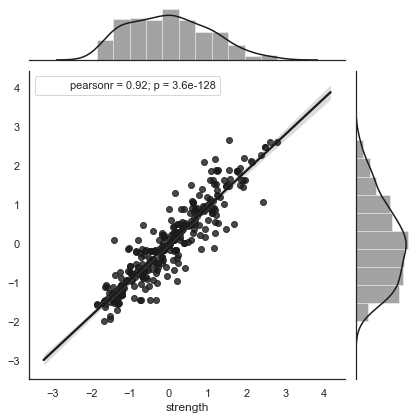

In [178]:
from scipy.stats import pearsonr
sns.set(style="darkgrid", color_codes=True)   
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred, stat_func=pearsonr,kind="reg", color="k");

In [179]:
tempResultsDf = pd.DataFrame({'Model':['Decision Tree2'], 'accuracy': [acc_DT]},index={'3'})
results = pd.concat([results, tempResultsDf])
results = results[['Model', 'accuracy']]
results

,Model,accuracy
1,Decision Tree,0.840931
2,Decision Tree k fold,0.856247
3,Decision Tree2,0.841514


In [ ]:
# Regularising/Pruning of Decision Tree

In [180]:
#independent and dependent variables
X=df_z.iloc[:,0:8]
y = df_z.iloc[:,8]
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

In [181]:
# Regularizing the Decision tree classifier and fitting the model
reg_dt_model = DecisionTreeRegressor( max_depth = 4,random_state=1,min_samples_leaf=5)
reg_dt_model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1, splitter='best')

In [182]:
print (pd.DataFrame(reg_dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))

                   Imp
cement        0.416953
slag          0.025822
ash           0.000000
water         0.135128
superplastic  0.017987
coarseagg     0.000000
fineagg       0.007793
age           0.396318


In [ ]:
* Here, we can see that ash,coarseagg and fineagg are least significant variable

In [184]:
y_pred = reg_dt_model.predict(X_test)
print('Performance on training data using DT:',reg_dt_model.score(X_train,y_train))
print('Performance on testing data using DT:',reg_dt_model.score(X_test,y_test))
acc_RDT=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_RDT)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using DT: 0.7255811799299218
Performance on testing data using DT: 0.6548277186105129
Accuracy DT:  0.6548277186105129
MSE:  0.36031160369896825


In [185]:
tempResultsDf = pd.DataFrame({'Model':['Pruned Decision Tree'], 'accuracy': [acc_RDT]},index={'4'})
results = pd.concat([results, tempResultsDf])
results = results[['Model', 'accuracy']]
results

,Model,accuracy
1,Decision Tree,0.840931
2,Decision Tree k fold,0.856247
3,Decision Tree2,0.841514
4,Pruned Decision Tree,0.654828


# K fold cross validation

In [186]:
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(reg_dt_model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.6819101662123233
Standard Deviation:  0.06252311979215476


In [187]:
tempResultsDf = pd.DataFrame({'Model':['Pruned Decision Tree k fold'], 'accuracy': [accuracy]},index={'5'})
results = pd.concat([results, tempResultsDf])
results = results[['Model', 'accuracy']]
results

,Model,accuracy
1,Decision Tree,0.840931
2,Decision Tree k fold,0.856247
3,Decision Tree2,0.841514
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.681910


# Iteration2

In [188]:
#Create a copy of the dataset
df3=df_z.copy()

In [189]:
#independent and dependent variable
X = df3.drop( ['strength','ash','coarseagg','fineagg'] , axis=1)
y =df3['strength']
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

In [190]:
reg_dt_model = DecisionTreeRegressor( max_depth = 4,random_state=1,min_samples_leaf=5)
reg_dt_model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1, splitter='best')

In [191]:
y_pred = reg_dt_model.predict(X_test)
print('Performance on training data using DT:',reg_dt_model.score(X_train,y_train))
print('Performance on testing data using DT:',reg_dt_model.score(X_test,y_test))
acc_RDT=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_RDT)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using DT: 0.7249584363084667
Performance on testing data using DT: 0.6634677033758938
Accuracy DT:  0.6634677033758938
MSE:  0.35129266754854116


In [192]:
tempResultsDf = pd.DataFrame({'Model':['Pruned Decision Tree2'], 'accuracy': [acc_RDT]},index={'6'})
results = pd.concat([results, tempResultsDf])
results = results[['Model', 'accuracy']]
results

,Model,accuracy
1,Decision Tree,0.840931
2,Decision Tree k fold,0.856247
3,Decision Tree2,0.841514
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.681910
6,Pruned Decision Tree2,0.663468


# K Means Clustering

In [193]:
cluster_range = range( 1, 15 )  
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(df1)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,3.709976e+07
1,2,2.774842e+07
2,3,2.141117e+07
3,4,1.868633e+07
4,5,1.656518e+07
5,6,1.499985e+07
6,7,1.388061e+07
7,8,1.242670e+07
8,9,1.125715e+07
9,10,1.058042e+07


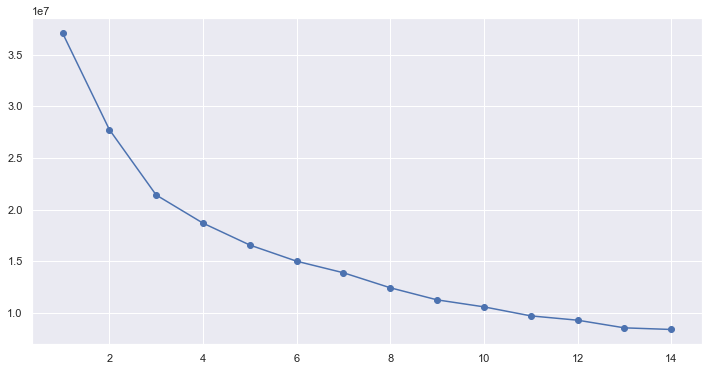

In [194]:
# Elbow plot
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [82]:
# k=6
cluster = KMeans( n_clusters = 6, random_state = 2354 )
cluster.fit(df_z)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=2354, tol=0.0001, verbose=0)

In [195]:
# Creating a new column "GROUP" which will hold the cluster id of each record
prediction=cluster.predict(df_z)
df_z["GROUP"] = prediction     
# Creating a mirror copy for later re-use instead of building repeatedly
df_z_copy = df_z.copy(deep = True)  

In [196]:
centroids = cluster.cluster_centers_
centroids

array([[-0.52847035,  0.25047012,  1.10117943,  0.4707871 ,  0.51065443,
        -1.14464266, -0.34207299, -0.2243148 , -0.27815339],
       [-0.60282287, -0.65663952,  1.10691052, -0.61327163,  0.49168022,
         0.62337539,  0.43508059,  0.27502291, -0.13528454],
       [ 0.3112026 , -0.83641215, -0.78154411,  0.44337009, -1.00073639,
         0.49854218,  0.39671798, -0.24628184, -0.68238245],
       [-0.87010755,  1.41482728, -0.84485042,  0.60549346, -0.75810292,
        -0.0430217 , -0.16744124, -0.16350135, -0.56135812],
       [ 1.00454194,  0.50203623, -0.51368191, -1.01583295,  1.02698603,
        -0.6014763 ,  0.15987254,  0.07455196,  1.1935206 ],
       [ 1.45045591, -0.42924132, -0.69489669,  1.30649175, -1.00149369,
         0.19438938, -1.65956143,  0.15842921,  0.70494449]])

In [197]:
centroid_df = pd.DataFrame(centroids, columns = list(df1) )
centroid_df

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,-0.528470,0.250470,1.101179,0.470787,0.510654,-1.144643,-0.342073,-0.224315,-0.278153
1,-0.602823,-0.656640,1.106911,-0.613272,0.491680,0.623375,0.435081,0.275023,-0.135285
2,0.311203,-0.836412,-0.781544,0.443370,-1.000736,0.498542,0.396718,-0.246282,-0.682382
3,-0.870108,1.414827,-0.844850,0.605493,-0.758103,-0.043022,-0.167441,-0.163501,-0.561358
4,1.004542,0.502036,-0.513682,-1.015833,1.026986,-0.601476,0.159873,0.074552,1.193521
5,1.450456,-0.429241,-0.694897,1.306492,-1.001494,0.194389,-1.659561,0.158429,0.704944


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A0D4D82B88>,
      dtype=object)

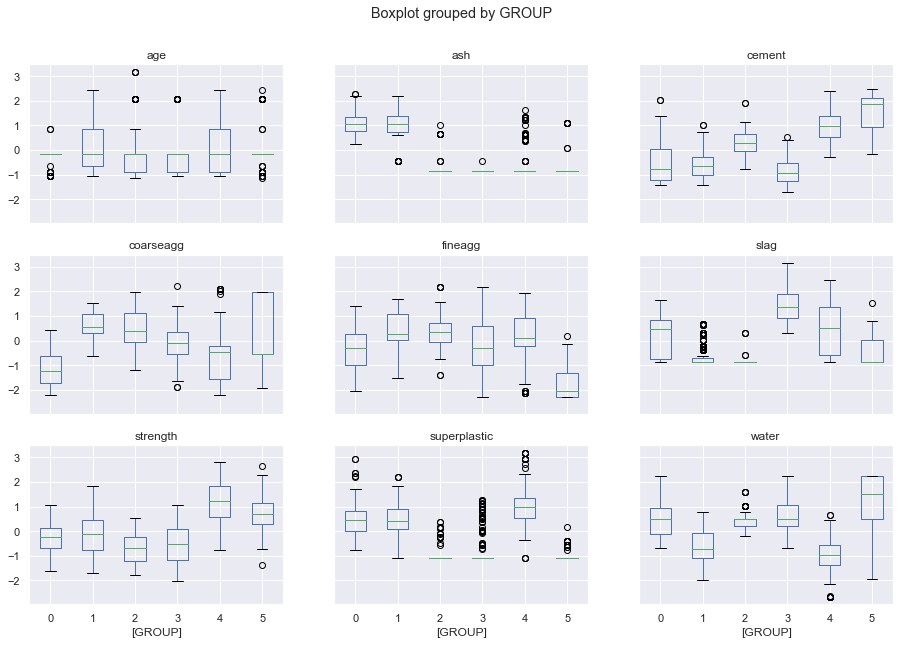

In [198]:
## Instead of interpreting the neumerical values of the centroids, let us do a visual analysis by converting the 
## centroids and the data in the cluster into box plots.
import matplotlib.pylab as plt
df_z.boxplot(by = 'GROUP',  layout=(3,3), figsize=(15, 10))

In [ ]:
*Here, None of the dimensions are good predictor of target variable.
*For all the dimensions (variables) every cluster have a similar range of values except in one case.
*We can see that the body of the cluster are overlapping.
*So in k means, though, there are clusters in datasets on different dimensions. 
*But we can not see any distinct characteristics of these clusters which tell us to break data into different clusters and build separate models for them.

# # Random Forest Regressor


In [199]:
#independent and dependent variables
X=df_z.iloc[:,0:8]
y =df_z.iloc[:,8]
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

In [200]:
model=RandomForestRegressor()
model.fit(X_train, y_train)

C:\Users\Sujana\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [201]:
y_pred = model.predict(X_test)
print('Performance on training data using RFR:',model.score(X_train,y_train))
print('Performance on testing data using RFR:',model.score(X_test,y_test))
acc_RFR=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_RFR)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using RFR: 0.9716141878450921
Performance on testing data using RFR: 0.8946883532849605
Accuracy DT:  0.8946883532849604
MSE:  0.10993063569104648


In [ ]:
* This model is also overfit

In [202]:
tempResultsDf = pd.DataFrame({'Model':['Random Forest Regressor'], 'accuracy': [acc_RFR]},index={'7'})
results = pd.concat([results, tempResultsDf])
results = results[['Model', 'accuracy']]
results

,Model,accuracy
1,Decision Tree,0.840931
2,Decision Tree k fold,0.856247
3,Decision Tree2,0.841514
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.681910
6,Pruned Decision Tree2,0.663468
7,Random Forest Regressor,0.894688


# K fold cross validation

In [203]:
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.9034660267978737
Standard Deviation:  0.023709314149042097


In [204]:
tempResultsDf = pd.DataFrame({'Model':['Random Forest Regressor k fold'], 'accuracy': [accuracy]},index={'8'})
results = pd.concat([results, tempResultsDf])
results = results[['Model', 'accuracy']]
results

,Model,accuracy
1,Decision Tree,0.840931
2,Decision Tree k fold,0.856247
3,Decision Tree2,0.841514
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.681910
6,Pruned Decision Tree2,0.663468
7,Random Forest Regressor,0.894688
8,Random Forest Regressor k fold,0.903466


# Gradient Boosting Regressor

In [205]:
model=GradientBoostingRegressor()
model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [206]:
y_pred = model.predict(X_test)
print('Performance on training data using GBR:',model.score(X_train,y_train))
print('Performance on testing data using GBR:',model.score(X_test,y_test))
acc_GBR=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_GBR)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using GBR: 0.9430469892492805
Performance on testing data using GBR: 0.892169368998112
Accuracy DT:  0.892169368998112
MSE:  0.1125601031107167


In [207]:
tempResultsDf = pd.DataFrame({'Model':['Gradient Boost Regressor'], 'accuracy': [acc_GBR]},index={'9'})
results = pd.concat([results, tempResultsDf])
results = results[['Model', 'accuracy']]
results

,Model,accuracy
1,Decision Tree,0.840931
2,Decision Tree k fold,0.856247
3,Decision Tree2,0.841514
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.681910
6,Pruned Decision Tree2,0.663468
7,Random Forest Regressor,0.894688
8,Random Forest Regressor k fold,0.903466
9,Gradient Boost Regressor,0.892169


# K fold cross validation

In [208]:
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.8994468527598742
Standard Deviation:  0.016940830421868284


In [209]:
tempResultsDf = pd.DataFrame({'Model':['Gradient Boost Regressor k fold'], 'accuracy': [accuracy]},index={'10'})
results = pd.concat([results, tempResultsDf])
results = results[['Model', 'accuracy']]
results

,Model,accuracy
1,Decision Tree,0.840931
2,Decision Tree k fold,0.856247
3,Decision Tree2,0.841514
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.681910
6,Pruned Decision Tree2,0.663468
7,Random Forest Regressor,0.894688
8,Random Forest Regressor k fold,0.903466
9,Gradient Boost Regressor,0.892169
10,Gradient Boost Regressor k fold,0.899447


# Ada Boosting Regressor

In [98]:
model=AdaBoostRegressor()
model.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None)

In [210]:
y_pred = model.predict(X_test)
print('Performance on training data using GBR:',model.score(X_train,y_train))
print('Performance on testing data using GBR:',model.score(X_test,y_test))
acc_ABR=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_ABR)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using GBR: 0.9430469892492805
Performance on testing data using GBR: 0.892169368998112
Accuracy DT:  0.892169368998112
MSE:  0.1125601031107167


In [211]:
tempResultsDf = pd.DataFrame({'Model':['Ada Boosting Regressor'], 'accuracy': [acc_ABR]},index={'11'})
results = pd.concat([results, tempResultsDf])
results = results[['Model', 'accuracy']]
results

,Model,accuracy
1,Decision Tree,0.840931
2,Decision Tree k fold,0.856247
3,Decision Tree2,0.841514
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.681910
6,Pruned Decision Tree2,0.663468
7,Random Forest Regressor,0.894688
8,Random Forest Regressor k fold,0.903466
9,Gradient Boost Regressor,0.892169
10,Gradient Boost Regressor k fold,0.899447


# K fold cross validation

In [212]:
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.89920450466741
Standard Deviation:  0.016700913124060766


In [213]:
tempResultsDf = pd.DataFrame({'Model':['Ada Boosting Regressor k fold'], 'accuracy': [accuracy]},index={'12'})
results = pd.concat([results, tempResultsDf])
results = results[['Model', 'accuracy']]
results

,Model,accuracy
1,Decision Tree,0.840931
2,Decision Tree k fold,0.856247
3,Decision Tree2,0.841514
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.681910
6,Pruned Decision Tree2,0.663468
7,Random Forest Regressor,0.894688
8,Random Forest Regressor k fold,0.903466
9,Gradient Boost Regressor,0.892169
10,Gradient Boost Regressor k fold,0.899447


# Bagging Regressor

In [214]:
model=BaggingRegressor()
model.fit(X_train, y_train)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=None, verbose=0,
                 warm_start=False)

In [216]:
y_pred = model.predict(X_test)
print('Performance on training data using BR:',model.score(X_train,y_train))
print('Performance on testing data using BR:',model.score(X_test,y_test))
acc_BR=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_BR)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using BR: 0.9723029838404256
Performance on testing data using BR: 0.9011981066809669
Accuracy DT:  0.9011981066809669
MSE:  0.10313536326546831


In [217]:
tempResultsDf = pd.DataFrame({'Model':['Bagging Regressor'], 'accuracy': [acc_BR]},index={'13'})
results = pd.concat([results, tempResultsDf])
results = results[['Model', 'accuracy']]
results

,Model,accuracy
1,Decision Tree,0.840931
2,Decision Tree k fold,0.856247
3,Decision Tree2,0.841514
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.681910
6,Pruned Decision Tree2,0.663468
7,Random Forest Regressor,0.894688
8,Random Forest Regressor k fold,0.903466
9,Gradient Boost Regressor,0.892169
10,Gradient Boost Regressor k fold,0.899447


# K fold cross validation

In [218]:
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.8955390187207453
Standard Deviation:  0.030792682653936254


In [219]:
tempResultsDf = pd.DataFrame({'Model':['Bagging Regressor k fold'], 'accuracy': [accuracy]},index={'14'})
results = pd.concat([results, tempResultsDf])
results = results[['Model', 'accuracy']]
results

,Model,accuracy
1,Decision Tree,0.840931
2,Decision Tree k fold,0.856247
3,Decision Tree2,0.841514
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.681910
6,Pruned Decision Tree2,0.663468
7,Random Forest Regressor,0.894688
8,Random Forest Regressor k fold,0.903466
9,Gradient Boost Regressor,0.892169
10,Gradient Boost Regressor k fold,0.899447


# KNN Regressor

In [220]:
error=[]
for i in range(1,30):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i!=y_test))

Text(0, 0.5, 'Mean error')

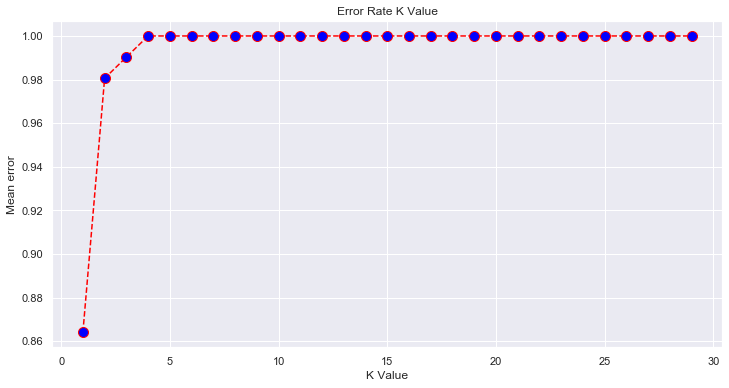

In [221]:
plt.figure(figsize=(12,6))
plt.plot(range(1,30),error,color='red', linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean error')

In [222]:
#k=3
model = KNeighborsRegressor(n_neighbors=3)
model.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [223]:
y_pred = model.predict(X_test)
print('Performance on training data using KNNR:',model.score(X_train,y_train))
print('Performance on testing data using KNNR:',model.score(X_test,y_test))
acc_K=metrics.r2_score(y_test, y_pred)
print('Accuracy KNNR: ',acc_K)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using KNNR: 0.8902196318573777
Performance on testing data using KNNR: 0.8078817663272165
Accuracy KNNR:  0.8078817663272165
MSE:  0.20054457616295157


In [224]:
tempResultsDf = pd.DataFrame({'Model':['KNN Regressor'], 'accuracy': [acc_K]},index={'15'})
results = pd.concat([results, tempResultsDf])
results = results[['Model', 'accuracy']]
results

,Model,accuracy
1,Decision Tree,0.840931
2,Decision Tree k fold,0.856247
3,Decision Tree2,0.841514
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.681910
6,Pruned Decision Tree2,0.663468
7,Random Forest Regressor,0.894688
8,Random Forest Regressor k fold,0.903466
9,Gradient Boost Regressor,0.892169
10,Gradient Boost Regressor k fold,0.899447


# K fold cross validation

In [225]:
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.7947547097467347
Standard Deviation:  0.03961462765692188


In [226]:
tempResultsDf = pd.DataFrame({'Model':['KNN Regressor k fold'], 'accuracy': [accuracy]},index={'16'})
results = pd.concat([results, tempResultsDf])
results = results[['Model', 'accuracy']]
results

,Model,accuracy
1,Decision Tree,0.840931
2,Decision Tree k fold,0.856247
3,Decision Tree2,0.841514
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.681910
6,Pruned Decision Tree2,0.663468
7,Random Forest Regressor,0.894688
8,Random Forest Regressor k fold,0.903466
9,Gradient Boost Regressor,0.892169
10,Gradient Boost Regressor k fold,0.899447


# Support Vector Regressor

In [227]:
model = SVR(kernel='linear')
model.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [228]:
y_pred = model.predict(X_test)
print('Performance on training data using SVR:',model.score(X_train,y_train))
print('Performance on testing data using SVR:',model.score(X_test,y_test))
acc_S=metrics.r2_score(y_test, y_pred)
print('Accuracy SVR: ',acc_S)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using SVR: 0.7195312919938222
Performance on testing data using SVR: 0.6932035001931365
Accuracy SVR:  0.6932035001931365
MSE:  0.32025265299303374


In [229]:
tempResultsDf = pd.DataFrame({'Model':['Support Vector Regressor'], 'accuracy': [acc_S]},index={'17'})
results = pd.concat([results, tempResultsDf])
results = results[['Model', 'accuracy']]
results

,Model,accuracy
1,Decision Tree,0.840931
2,Decision Tree k fold,0.856247
3,Decision Tree2,0.841514
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.681910
6,Pruned Decision Tree2,0.663468
7,Random Forest Regressor,0.894688
8,Random Forest Regressor k fold,0.903466
9,Gradient Boost Regressor,0.892169
10,Gradient Boost Regressor k fold,0.899447


# K fold cross validation


In [230]:
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.6971192327136142
Standard Deviation:  0.036742110058929286


In [231]:
tempResultsDf = pd.DataFrame({'Model':['SVR k fold'], 'accuracy': [accuracy]},index={'18'})
results = pd.concat([results, tempResultsDf])
results = results[['Model', 'accuracy']]
results

,Model,accuracy
1,Decision Tree,0.840931
2,Decision Tree k fold,0.856247
3,Decision Tree2,0.841514
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.681910
6,Pruned Decision Tree2,0.663468
7,Random Forest Regressor,0.894688
8,Random Forest Regressor k fold,0.903466
9,Gradient Boost Regressor,0.892169
10,Gradient Boost Regressor k fold,0.899447


# Ensemeble KNN Regressor, SVR, LR


In [232]:
#Multiple model Ensemble
from sklearn import svm
LR=LinearRegression()
KN=KNeighborsRegressor(n_neighbors=3)
SVM=svm.SVR(kernel='linear') 

In [233]:
evc=VotingRegressor(estimators=[('LR',LR),('KN',KN),('SVM',SVM)])
evc.fit(X_train, y_train)

VotingRegressor(estimators=[('LR',
                             LinearRegression(copy_X=True, fit_intercept=True,
                                              n_jobs=None, normalize=False)),
                            ('KN',
                             KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                                 metric='minkowski',
                                                 metric_params=None,
                                                 n_jobs=None, n_neighbors=3,
                                                 p=2, weights='uniform')),
                            ('SVM',
                             SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma='auto_deprecated',
                                 kernel='linear', max_iter=-1, shrinking=True,
                                 tol=0.001, verbose=False))],
                n_jobs=None, weights=None)

In [234]:
y_pred = evc.predict(X_test)
print('Performance on training data using ensemble:',evc.score(X_train,y_train))
print('Performance on testing data using ensemble:',evc.score(X_test,y_test))
acc_E=metrics.r2_score(y_test, y_pred)
print('Accuracy ensemble: ',acc_E)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using ensemble: 0.8213604308836657
Performance on testing data using ensemble: 0.7849191766894733
Accuracy ensemble:  0.7849191766894733
MSE:  0.22451430937603264


In [235]:
tempResultsDf = pd.DataFrame({'Model':['Ensemble'], 'accuracy': [acc_E]},index={'19'})
results = pd.concat([results, tempResultsDf])
results = results[['Model', 'accuracy']]
results

,Model,accuracy
1,Decision Tree,0.840931
2,Decision Tree k fold,0.856247
3,Decision Tree2,0.841514
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.681910
6,Pruned Decision Tree2,0.663468
7,Random Forest Regressor,0.894688
8,Random Forest Regressor k fold,0.903466
9,Gradient Boost Regressor,0.892169
10,Gradient Boost Regressor k fold,0.899447


# K fold cross validation


In [236]:
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(evc,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.7803291490734494
Standard Deviation:  0.029918532582796697


In [237]:
tempResultsDf = pd.DataFrame({'Model':['Ensemble k fold'], 'accuracy': [accuracy]},index={'20'})
results = pd.concat([results, tempResultsDf])
results = results[['Model', 'accuracy']]
results

,Model,accuracy
1,Decision Tree,0.840931
2,Decision Tree k fold,0.856247
3,Decision Tree2,0.841514
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.681910
6,Pruned Decision Tree2,0.663468
7,Random Forest Regressor,0.894688
8,Random Forest Regressor k fold,0.903466
9,Gradient Boost Regressor,0.892169
10,Gradient Boost Regressor k fold,0.899447


In [ ]:
*After applying all the models we can see that Random Forest Regressor, Random Forest Regressor k fold, Gradient Boost Regressor, Gradient Boost Regressor k fold, Bagging Regressor , Ada Boosting Regressor are giving better results as compared to other models.

In [ ]:
## Bootstrap Sampling

In [244]:
concrete_XY = X.join(y)

# Using Gradient Boosting Regressor

In [245]:
values = concrete_XY.values
# Number of bootstrap samples to create
n_iterations = 1000        
# size of a bootstrap sample
n_size = int(len(df_z) * 1)    

# run bootstrap
# empty list that will hold the scores for each bootstrap iteration
stats = list()   
for i in range(n_iterations):
    # prepare train and test sets
    train = resample(values, n_samples=n_size)  # Sampling with replacement 
    test = np.array([x for x in values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample
    
    
     # fit model
    gbmTree = GradientBoostingRegressor(n_estimators=50)
    # fit against independent variables and corresponding target values
    gbmTree.fit(train[:,:-1], train[:,-1]) 
    # Take the target column for all rows in test set

    y_test = test[:,-1]    
    # evaluate model
    # predict based on independent variables in the test data
    score = gbmTree.score(test[:, :-1] , y_test)
    predictions = gbmTree.predict(test[:, :-1])  

    stats.append(score)

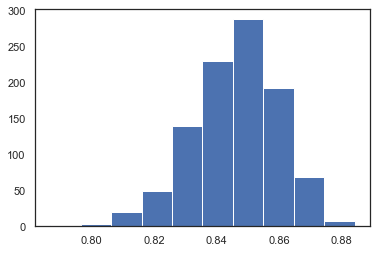

95.0 confidence interval 81.6% and 87.0%


In [246]:
# plot scores

from matplotlib import pyplot
pyplot.hist(stats)
pyplot.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

# Using Random Forest Regressor

In [248]:
values = concrete_XY.values
# Number of bootstrap samples to create
n_iterations = 1000        
# size of a bootstrap sample
n_size = int(len(df_z) * 1)    

# run bootstrap
# empty list that will hold the scores for each bootstrap iteration
stats = list()   
for i in range(n_iterations):
    # prepare train and test sets
    train = resample(values, n_samples=n_size)  # Sampling with replacement 
    test = np.array([x for x in values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample
    
    
     # fit model
    rfTree = RandomForestRegressor(n_estimators=100)
    # fit against independent variables and corresponding target values
    rfTree.fit(train[:,:-1], train[:,-1]) 
    # Take the target column for all rows in test set

    y_test = test[:,-1]    
    # evaluate model
    # predict based on independent variables in the test data
    score = rfTree.score(test[:, :-1] , y_test)
    predictions = rfTree.predict(test[:, :-1])  

    stats.append(score)

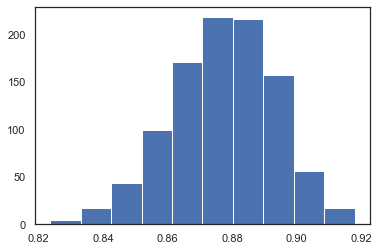

95.0 confidence interval 84.3% and 90.6%


In [249]:
# plot scores

from matplotlib import pyplot
pyplot.hist(stats)
pyplot.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

In [ ]:
 **Bootstrap random forest classification model performance is between 84%-90.8% which is better than other classification algorithms.